In [1]:
import numpy as np
import matplotlib.pyplot as plt
### Wir benutzen das fivethirtyeight style, damit die plots ein bisschen hübscher aussehen
### könnte auch weggelassen werden
plt.style.use('fivethirtyeight')

path="../evrp-benchmark-set/"
inst_name="E-n22-k4.evrp"

In [58]:
import math

class Instance:
    def __init__(self,attributes,nodes,customers,stations,demands,depot):
        self.depot=depot
        self.nodes=nodes
        self.demands=demands
        self.customers=customers
        self.stations=stations
        self.attributes=attributes

    def dist(self,p,q):
        # dist always Euclidean
        px,py=self.nodes[p]
        qx,qy=self.nodes[q]
        return math.sqrt((px-qx)**2+(py-qy)**2)

class Instance_Reader:
    def __init__(self,filename):
        self.filename=filename
        self.attributes={}
        self.depot=None
        self.nodes={}
        self.demands={}
        self.customers=[]
        self.stations=[]
        self.demands={}
        self.process_line=None
        self.run()

    def process_attribute(self,line):
        splits=line.split(':')
        value="".join(splits[1:]).strip()
        try:
            value=int(value)
        except ValueError:
            try:
                value=float(value)
            except ValueError:
                pass
        self.attributes[splits[0]]=value

    def toggle_section(self,line):
        if line=="NODE_COORD_SECTION":
            self.process_line=self.process_node_line
        elif line=="DEMAND_SECTION":
            self.process_line=self.process_demand_line
        elif line=="DEPOT_SECTION":
            self.process_line=self.process_depot_line
        elif line=="STATIONS_COORD_SECTION":
            self.process_line=self.process_station_line
        elif line=="EOF":
            self.process_line=self.process_EOF
        else:
            return False
        return True

    def process_node_line(self,line):
        splits=line.split(' ')
        self.nodes[int(splits[0])]=(int(splits[1]),int(splits[2]))

    def process_demand_line(self,line):
        splits=line.split(' ')
        customer=int(splits[0])
        self.customers.append(customer)
        self.demands[customer]=int(splits[1])
    
    def process_depot_line(self,line):
        value=int(line)
        if value>=0:
            self.depot=value
        
    def process_station_line(self,line):        
        self.stations.append(int(line))

    def process_EOF(self,line):
        pass

    def run(self):
        with open(self.filename,'r') as f:
            for line in f:
                line=line.strip()
                if ':' in line:
                    self.process_attribute(line)
                elif not self.toggle_section(line):
                    self.process_line(line)
        self.setup_instance()

    def setup_instance(self):
        if not self.depot in self.stations:
            self.stations.append(self.depot) # depot counts as charging station
        self.instance=Instance(self.attributes,self.nodes,self.customers,self.stations,self.demands,self.depot)
   
import os
        
def read_in_all_instances(path):
    instances={}
    for root, dirs, files in os.walk(path):
        for filename in files:
            filepath=os.path.join(root,filename)
            if filename.endswith(".evrp"):
                inst=Instance_Reader(filepath).instance
                instances[filename[:-5]]=inst
    return instances

In [59]:
inst=Instance_Reader(path+inst_name).instance

In [4]:
inst.attributes

{'Name': 'Mavrovouniotis Menelaou Instances Test 1',
 'COMMENT': 'Modificatification of E-n22-k4 instance. Modified by Mavrovouniotis Menelaou.',
 'TYPE': 'EVRP',
 'OPTIMAL_VALUE': 384.678035,
 'VEHICLES': 4,
 'DIMENSION': 22,
 'STATIONS': 8,
 'CAPACITY': 6000,
 'ENERGY_CAPACITY': 94,
 'ENERGY_CONSUMPTION': 1.2,
 'EDGE_WEIGHT_FORMAT': 'EUC_2D'}

In [5]:
inst.demands

{1: 0,
 2: 1100,
 3: 700,
 4: 800,
 5: 1400,
 6: 2100,
 7: 400,
 8: 800,
 9: 100,
 10: 500,
 11: 600,
 12: 1200,
 13: 1300,
 14: 1300,
 15: 300,
 16: 900,
 17: 2100,
 18: 1000,
 19: 900,
 20: 2500,
 21: 1800,
 22: 700}

In [6]:
inst.stations

[23, 24, 25, 26, 27, 28, 29, 30]

In [7]:
inst.customers

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

In [8]:
inst.depot

1

In [9]:
inst.nodes

{1: (145, 215),
 2: (151, 264),
 3: (159, 261),
 4: (130, 254),
 5: (128, 252),
 6: (163, 247),
 7: (146, 246),
 8: (161, 242),
 9: (142, 239),
 10: (163, 236),
 11: (148, 232),
 12: (128, 231),
 13: (156, 217),
 14: (129, 214),
 15: (146, 208),
 16: (164, 208),
 17: (141, 206),
 18: (147, 193),
 19: (164, 193),
 20: (129, 189),
 21: (155, 185),
 22: (139, 182),
 23: (137, 193),
 24: (137, 213),
 25: (137, 234),
 26: (137, 254),
 27: (155, 193),
 28: (155, 213),
 29: (155, 234),
 30: (155, 254)}

In [13]:
instances=read_in_all_instances(path)

In [14]:
instances

{'X-n573-k30': <__main__.Instance at 0x7fe88a3597f0>,
 'X-n749-k98': <__main__.Instance at 0x7fe888697640>,
 'X-n1001-k43': <__main__.Instance at 0x7fe888697be0>,
 'X-n214-k11': <__main__.Instance at 0x7fe8e98c0d00>,
 'X-n143-k7': <__main__.Instance at 0x7fe888ae0310>,
 'X-n819-k171': <__main__.Instance at 0x7fe8886976d0>,
 'E-n101-k8': <__main__.Instance at 0x7fe888ae0880>,
 'X-n916-k207': <__main__.Instance at 0x7fe888697c10>,
 'E-n23-k3': <__main__.Instance at 0x7fe888ae01f0>,
 'E-n51-k5': <__main__.Instance at 0x7fe888ae0820>,
 'X-n351-k40': <__main__.Instance at 0x7fe888fc7e80>,
 'E-n33-k4': <__main__.Instance at 0x7fe888fc7d00>,
 'E-n76-k7': <__main__.Instance at 0x7fe888fc7730>,
 'E-n30-k3': <__main__.Instance at 0x7fe888fc7eb0>,
 'X-n685-k75': <__main__.Instance at 0x7fe888ae0970>,
 'X-n459-k26': <__main__.Instance at 0x7fe888fc7670>,
 'E-n22-k4': <__main__.Instance at 0x7fe888fc7b50>}

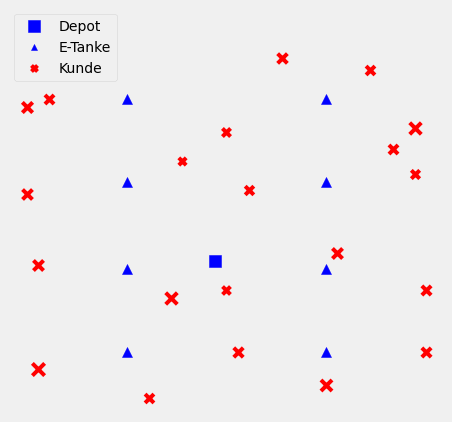

In [222]:
def get_scaler(instance):
    vals=np.array(list(instance.demands.values()))
    dmin,dmax=min(vals),max(vals)
    
    def scale(demand):
        return 50+(demand-dmin)/(dmax-dmin)*100
    
    return scale

def plot_vehicle_tour(vehicle_tour,instance,ax,vehicle_number=None):
    for i,_ in enumerate(vehicle_tour[1:]):
        start=instance.nodes[vehicle_tour[i]]
        stop=instance.nodes[vehicle_tour[i+1]]
        ax.plot([start[0],stop[0]],[start[1],stop[1]],'gray',linewidth=3,zorder=-1)
    if vehicle_number is not None:
        ax.set_title('Fahrzeug #{}'.format(vehicle_number))
            

def plot_tour(tour,instance,ax):
    tour=ensure_depot(tour,instance)
    for vehicle_tour in tour:
        plot_vehicle_tour(vehicle_tour,instance,ax)
        
def show(instance,tour=None):
    fig,ax=plt.subplots(1,1,figsize=(7,7))
    depot=instance.nodes[instance.depot]
    ax.scatter([depot[0]],[depot[1]],s=150,marker='s',label='Depot',color='b')
    size_scaler=get_scaler(instance)
    for customer in instance.customers:
        if customer==instance.depot:
            continue
        ax.scatter([instance.nodes[customer][0]],[instance.nodes[customer][1]],color='r',marker='x',s=size_scaler(instance.demands[customer]))

    for station in instance.stations:
        if station==instance.depot:
            continue
        ax.scatter([instance.nodes[station][0]],[instance.nodes[station][1]],color='b',marker='^',s=100)


    vals=np.array(list(instance.nodes.values()))
    xmax,xmin=max(vals[:,0]),min(vals[:,0])
    ymax,ymin=max(vals[:,1]),min(vals[:,1])
    xmarge=0.05*(xmax-xmin)
    ymarge=0.05*(ymax-ymin)

    for label,marker,color in [('E-Tanke','^','b'),('Kunde','x','r')]:
        ax.scatter([],[],marker=marker,label=label,color=color)
        pass
        
    if tour is not None:
        plot_tour(tour,instance,ax)

    ax.set_xlim(xmin-xmarge,xmax+xmarge)
    ax.set_ylim(ymin-ymarge,ymax+3*ymarge)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.legend(loc="upper left")
    plt.show()   

show(inst)

Eine Lösung ist eine Liste von Listen: jede Liste entspricht der Tour eines der EV.

In [225]:
def flatten(list_of_lists):
    flat_list = [item for sublist in list_of_lists for item in sublist]
    return flat_list

def check_for_single_customer(customer,tour):
    for vehicle_tour in tour:
        if customer in vehicle_tour:
            return True
    return False

def check_for_customers(tour,instance):
    for customer in instance.customers:
        if not check_for_single_customer(customer,tour):
            print("Kunde {} wird nicht angefahren!".format(customer))
            return False
    return True
        
def compute_loads(tour,instance):
    loads=[]
    for vehicle_tour in tour:
        load=0
        for stop in vehicle_tour:
            load+=instance.demands.get(stop,0)
        loads.append(load)
    return loads
    
def check_for_capacity(tour,instance):
    loads=compute_loads(tour,instance)
    if max(loads)>instance.attributes['CAPACITY']:
        print("Ladung {} übersteigt maximale Ladung von {}!".format(max(loads),instance.attributes['CAPACITY']))
        return False
    return True

def ensure_depot(tour,instance):
    new_tour=[]
    for vehicle_tour in tour:
        new_vehicle_tour=vehicle_tour.copy()
        if len(new_vehicle_tour)==0 or new_vehicle_tour[0]!=instance.depot:
            new_vehicle_tour.insert(0,instance.depot)
        if new_vehicle_tour[-1]!=instance.depot:
            new_vehicle_tour.append(instance.depot)
        new_tour.append(new_vehicle_tour)
    return new_tour

def compute_charge_lvls(tour,instance):
    tour=ensure_depot(tour,instance)
    energy_consumption_factor=instance.attributes['ENERGY_CONSUMPTION']
    max_charge=instance.attributes['ENERGY_CAPACITY']
    charge_lvls_per_vehicle=[]
    for vehicle_tour in tour:
        charge=max_charge  ## vehicle starts fully charged at depot
        charge_lvls=[charge]
        charge_lvls_per_vehicle.append(charge_lvls)
        for i,stop in enumerate(vehicle_tour[1:]):
            consumption=instance.dist(vehicle_tour[i],stop)*energy_consumption_factor
            charge=charge-consumption
            charge_lvls.append(charge)
            if stop in instance.stations:  ## stop is charging station
                charge=max_charge          ## vehicle charges
    return charge_lvls_per_vehicle

def check_for_range(tour,instance):
    charge_lvls=compute_charge_lvls(tour,instance)
    if min(flatten(charge_lvls))<0:
        print("Reichweite überschritten!")
        print("Ladungsstände: ")
        print(charge_lvls)
        return False
    return True

def check_for_num_vehicles(tour,instance):
    if len(tour)>instance.attributes['VEHICLES']:
        print("Es werden {} Fahrzeuge eingesetzt, es sind jedoch nur {} Fahrzeuge vorhanden!".format(len(tour),instance.attributes['VEHICLES']))
        return False
    return True
    
def validate(tour,instance):
    num_v=check_for_num_vehicles(tour,instance)
    cust=check_for_customers(tour,instance)
    rng=check_for_range(tour,instance)
    cap=check_for_capacity(tour,instance)
    return num_v and cust and rng and cap 

def tour_lengths(tour,instance):
    tour=ensure_depot(tour,instance)
    lengths=[]
    for vehicle_tour in tour:
        length=0
        for i,_ in enumerate(vehicle_tour[1:]):
            edge_length=instance.dist(vehicle_tour[i],vehicle_tour[i+1])
            length+=edge_length
        lengths.append(length)
    return lengths
        
def tour_length(tour,instance):
    tour=ensure_depot(tour,instance)
    length=0
    for vehicle_tour in tour:
        for i,_ in enumerate(vehicle_tour[1:]):
            edge_length=instance.dist(vehicle_tour[i],vehicle_tour[i+1])
            length+=edge_length
    return length

In [66]:
tour_length([inst.customers],inst)

461.19394622963324

In [102]:
[inst.customers] is not None

True

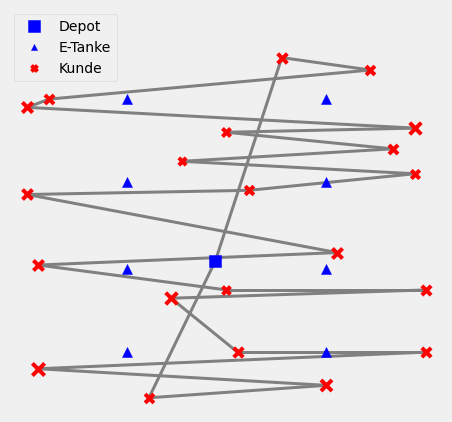

In [128]:
show(inst,tour=[inst.customers])

In [168]:
import random

def tour_vector_to_list(tour_vector):
    vehicle_tour=[]
    tour=[vehicle_tour]
    for stop in tour_vector:
        if stop<0:
            vehicle_tour=[]
            tour.append(vehicle_tour)
        else:
            vehicle_tour.append(stop)
    return tour

def rnd_tour_vector(instance):
    tour_vector=instance.customers.copy()
    num_vehicles=instance.attributes['VEHICLES']
    for i in range(num_vehicles-1):
        tour_vector.append(-(i+1))
    random.shuffle(tour_vector)
    return tour_vector

def rnd_tour(instance):
    return tour_vector_to_list(rnd_tour_vector(instance))

In [179]:
tour=rnd_tour(inst)
tour

[[13, 14],
 [10, 20, 9, 8, 2],
 [22, 7, 12, 11, 5, 18, 16],
 [3, 17, 6, 1, 15, 21, 19, 4]]

In [180]:
validate(tour,inst)

Reichweite überschritten!
Ladungsstände: 
[[94, 80.58359213500125, 47.98420563770656, 28.74674218744888], [94, 60.80963995374561, -8.800704105165629, -70.79554259999517, -93.87800347400079, -122.87731381062777, -182.11649003717568], [94, 53.75077640500379, -23.50723288853159, -51.62413172179554, -75.65411299519648, -109.59523849215077, -183.9758811352471, -211.18176285225823, -235.47991092983813], [94, 36.30008665517773, -33.14456756672765, -88.9800401625605, -133.03818356420646, 85.51471862576143, 55.87690494121311, 41.426991446662356, -42.37563381054542, -92.51783160840824]]
Ladung 8700 übersteigt maximale Ladung von 6000!


False

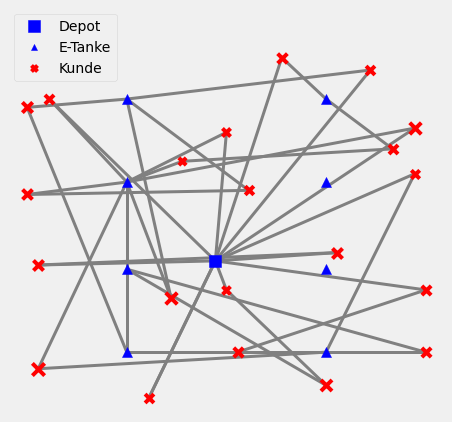

In [186]:
show(inst,tour=tour)

In [178]:
def sum_under_charges(tour,instance):
    charge_lvls=compute_charge_lvls(tour,instance)
    flat_charges=flatten(charge_lvls)
    return -sum([charge for charge in flat_charges if charge<0])

def insert_station(vehicle_tour,instance,tries=10):
    best=sum_under_charges([vehicle_tour],instance)
    if best==0:
        return 0
    best_pos=-1
    best_station=-1
    for _ in range(tries):
        station=random.choice(instance.stations)
        pos=random.randint(0,len(vehicle_tour))
        vehicle_tour.insert(pos,station)
        under_charge=sum_under_charges([vehicle_tour],instance)
        if under_charge<best:
            best=under_charge
            best_pos=pos
            best_station=station
        del vehicle_tour[pos]
    if best_pos<0:
        return best
    vehicle_tour.insert(best_pos,best_station)
    return best

def insert_stations(vehicle_tour,instance,max_stations=3,tries=10):
    under_charge=np.inf
    for _ in range(max_stations):
        under_charge=insert_station(vehicle_tour,instance,tries=tries)
        if under_charge==0:
            return

def fix_range(tour,instance):
    for vehicle_tour in tour:
        insert_stations(vehicle_tour,instance,max_stations=100,tries=30)

In [182]:
sum_under_charges(tour,inst)

1759.542581754431

In [183]:
fix_range(tour,inst)

In [184]:
sum_under_charges(tour,inst)

0

In [185]:
tour

[[13, 14],
 [10, 27, 20, 25, 9, 8, 30, 2],
 [22, 1, 7, 25, 12, 11, 26, 5, 23, 18, 16],
 [3, 26, 17, 25, 6, 1, 15, 21, 24, 19, 23, 25, 4]]

In [161]:
vt

[2, 9, 14, 13, 11, 12, 17, 20, 24, 19, 10, 6, 16, 7]

In [162]:
sum_under_charges([vt],inst)

1115.1371042884327

In [175]:
insert_stations(vt,inst)
vt

[22, 16, 27, 4, 26, 7, 10, 1, 13, 14]

In [223]:
def plot_inst(instance,ax):
    depot=instance.nodes[instance.depot]
    ax.scatter([depot[0]],[depot[1]],s=150,marker='s',label='Depot',color='b')
    size_scaler=get_scaler(instance)
    for customer in instance.customers:
        if customer==instance.depot:
            continue
        ax.scatter([instance.nodes[customer][0]],[instance.nodes[customer][1]],color='r',marker='x',s=size_scaler(instance.demands[customer]))

    for station in instance.stations:
        if station==instance.depot:
            continue
        ax.scatter([instance.nodes[station][0]],[instance.nodes[station][1]],color='b',marker='^',s=100)


    vals=np.array(list(instance.nodes.values()))
    xmax,xmin=max(vals[:,0]),min(vals[:,0])
    ymax,ymin=max(vals[:,1]),min(vals[:,1])
    xmarge=0.05*(xmax-xmin)
    ymarge=0.05*(ymax-ymin)

    for label,marker,color in [('E-Tanke','^','b'),('Kunde','x','r')]:
        ax.scatter([],[],marker=marker,label=label,color=color)
        pass
        
    ax.set_xlim(xmin-xmarge,xmax+xmarge)
    ax.set_ylim(ymin-ymarge,ymax+3*ymarge)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.legend(loc="upper left")
    

def show(instance,tour=[None],num_cols=3):
    num_rows=(len(tour)+num_cols-1)//num_cols
    plt.figure(figsize=(20,20/num_cols*num_rows))
    if tour[0] is not None:
        tour=ensure_depot(tour,instance)
    for i,vehicle_tour in enumerate(tour):
        ax=plt.subplot(num_rows,num_cols,i+1)
        plot_inst(instance,ax)
        if vehicle_tour is not None:
            plot_vehicle_tour(vehicle_tour,instance,ax,vehicle_number=i+1)
    #plt.tight_layout()
    plt.show()   


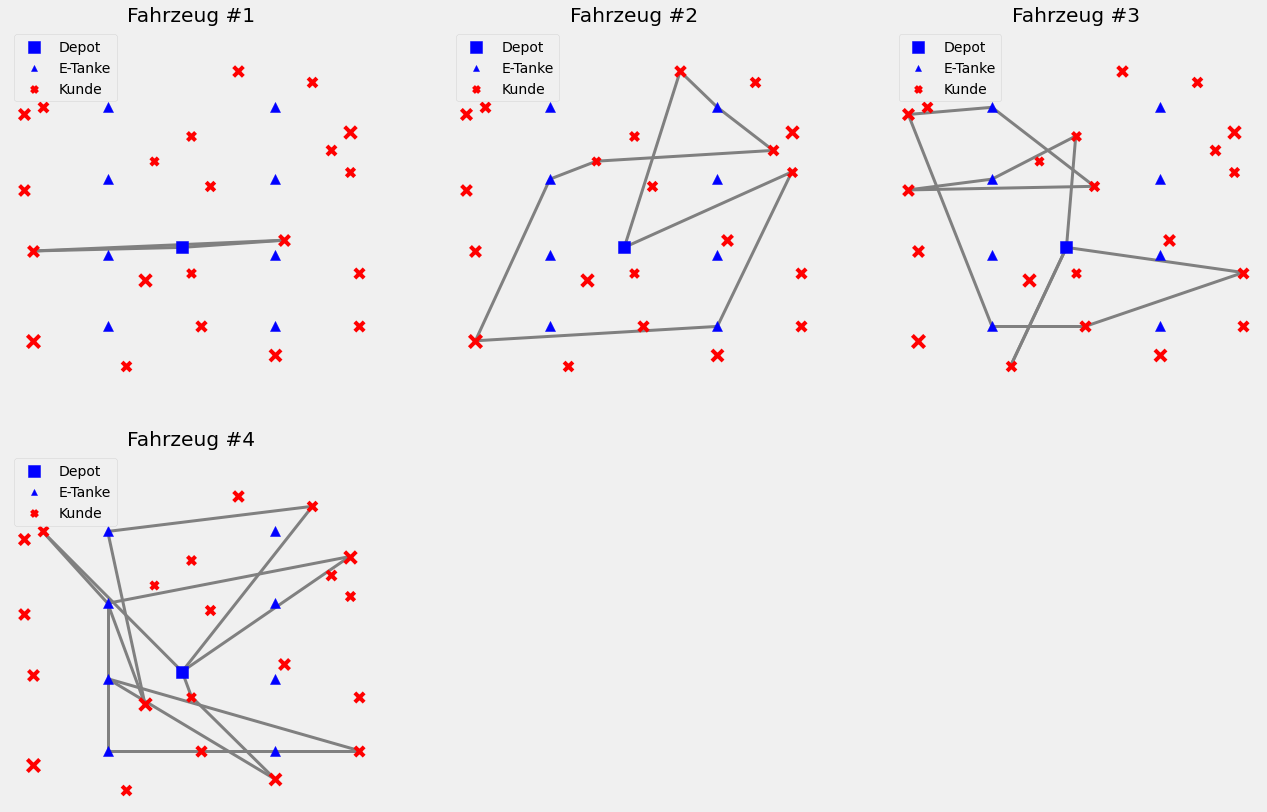

In [224]:
show(inst,tour=tour)

In [234]:
import pandas as pd

def count_stations(tour,instance):
    tour=ensure_depot(tour,instance)
    counts=[]
    for vehicle_tour in tour:
        station_count=0
        for stop in vehicle_tour[1:-1]:
            if stop in instance.stations:
                station_count+=1
        counts.append(station_count)
    return counts

def vehicle_stats(tour,instance):
    loads=compute_loads(tour,instance)
    charge_lvls=compute_charge_lvls(tour,instance)
    min_charges=[min(charges) for charges in charge_lvls]
    lengths=tour_lengths(tour,instance)
    station_counts=count_stations(tour,instance)
    data=np.array([loads,min_charges,station_counts,lengths]).T
    columns=['Auslastung','Ladungs-Min','#Ladehalts','Streckenlänge']
    index=range(1,len(tour)+1)
    df=pd.DataFrame(data,columns=columns,index=index)
    df.index.name='Fahrzeug'
    return df

In [235]:
vehicle_stats(tour,inst)

,Auslastung,Ladungs-Min,#Ladehalts,Streckenlänge
Fahrzeug,,,,
1,2600.0,28.746742,0.0,54.377715
2,5000.0,7.586233,3.0,243.267131
3,6200.0,11.317555,4.0,289.028792
4,8700.0,2.259221,6.0,443.035967


In [236]:
tour

[[13, 14],
 [10, 27, 20, 25, 9, 8, 30, 2],
 [22, 1, 7, 25, 12, 11, 26, 5, 23, 18, 16],
 [3, 26, 17, 25, 6, 1, 15, 21, 24, 19, 23, 25, 4]]

In [237]:
inst.stations

[23, 24, 25, 26, 27, 28, 29, 30, 1]

In [238]:
def soft_objective_function(tour,instance,WEIGHT=1E6):
    loads=compute_loads(tour,instance)
    max_load=instance.attributes['CAPACITY']
    load_penalty=sum([max(load-max_load,0) for load in loads])*WEIGHT
    charge_penalty=sum_under_charges(tour,instance)*WEIGHT
    return load_penalty+charge_penalty+tour_length(tour,instance)

In [239]:
soft_objective_function(tour,inst)

2900001029.7096043

In [245]:
tries=1000
best=np.inf
best_tour=None
for _ in range(tries):
    tour=rnd_tour(inst)
    fix_range(tour,inst)
    obj=soft_objective_function(tour,inst)
    if obj<best:
        best=obj
        best_tour=tour
        print("Improvement! {}".format(best))
        
validate(tour,inst)

Improvement! 4500001048.37658
Improvement! 2500001039.940076
Improvement! 2500000973.4175224
Improvement! 900001007.9138781
Improvement! 400000900.2495331
Improvement! 300001064.9728046
Ladung 9300 übersteigt maximale Ladung von 6000!


False

In [246]:
vehicle_stats(tour,inst)

,Auslastung,Ladungs-Min,#Ladehalts,Streckenlänge
Fahrzeug,,,,
1,7300.0,8.173176,8.0,488.479617
2,3800.0,15.734335,1.0,111.327288
3,2100.0,8.745919,1.0,121.556458
4,9300.0,0.067554,5.0,322.221428


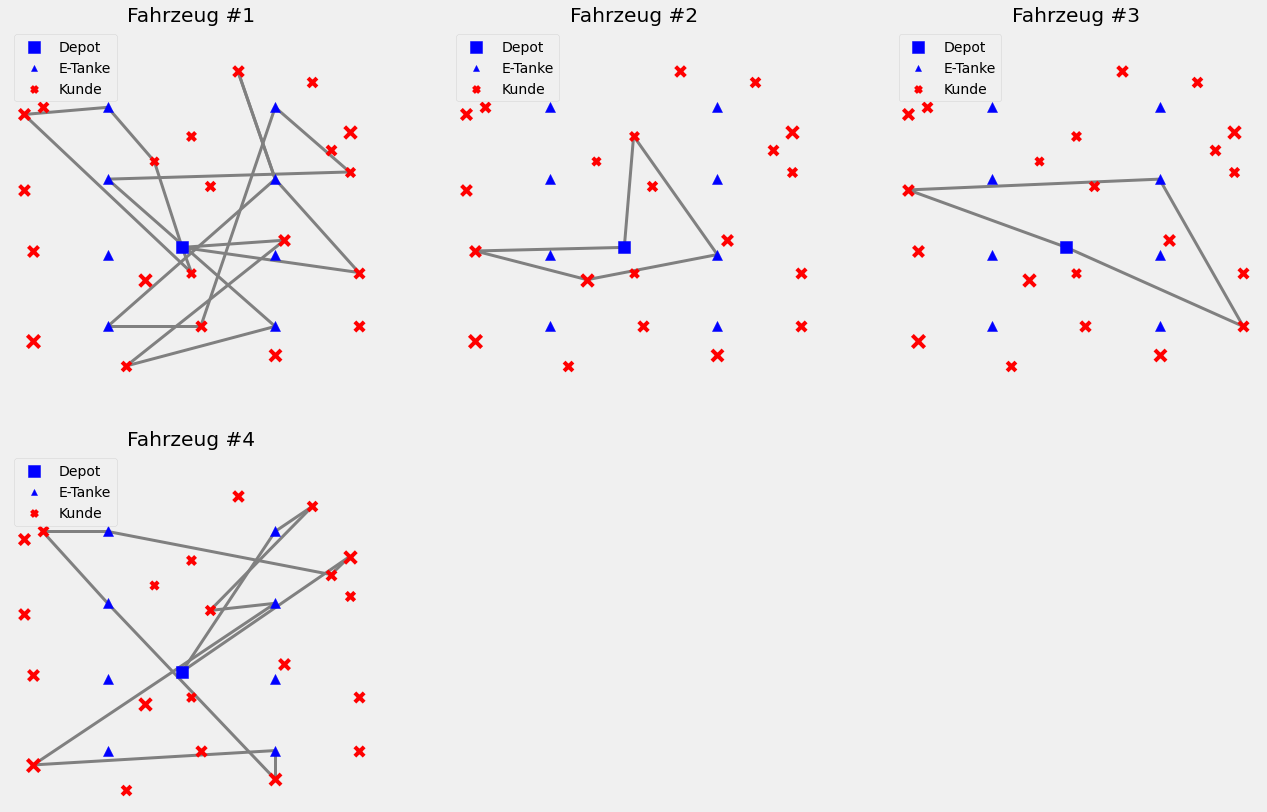

In [247]:
show(inst,tour=tour)

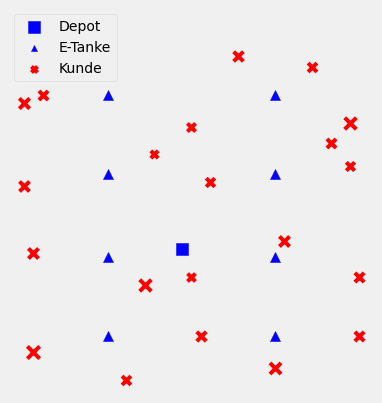

In [248]:
show(inst)